In [ ]:
!pip install PuLP

In [1]:
import pulp
import tempfile
pulp.LpSolverDefault.tmpDir = tempfile.gettempdir()


In [10]:
import pulp

try:
    print("------Welcome to EGC Model------")
    print("\nSelect 1 for Non-renewable energy generation")
    print("\nSelect 2 for Renewable energy generation")
    print("\nSelect 3 for both energy generation")

    selected_option=int(input("\nEnter your choice :"))

    if selected_option==1:
        renewable_vars=0
        n = int(input("\nNumber of Non- Renewable Generators: "))
        if n < 0:
            print("Number of Generators should be Positive")
        elif n == 0:
            print("Number of Generators should not be zero")
        else:
            print("\nEnter details for Non-Renewable Generators:")
            min_power = []
            max_power = []
            cost_nr = []

            for i in range(n):
                print("Generator", i + 1)
                min_p = float(input("Minimum M/W of electricity by Generator:"))
                max_p = float(input("Maximum M/W of electricity by Generator:"))
                if max_p < min_p:
                    raise ValueError("Minimum power cannot be greater than maximum power.")
            
            
                cost = float(input("Enter cost per MW for Generator:"))

                min_power.append(min_p)
                max_power.append(max_p)
                cost_nr.append(cost)
            #define Decision variables
            power_vars=[pulp.LpVariable(f"Gen_{i+1}",min_power[i],max_power[i])for i in range(n)]#for Non-renweable Generators
       
        
        RT_Demand = float(input("Enter Real Time Demand:"))
        Grid_Capacity = float(input("Enter Grid Capacity (MW): "))
        if RT_Demand > Grid_Capacity:
            raise ValueError("Real Time Demand cannot exceed Grid Capacity.")
        elif RT_Demand < 0:
            print("Real Time Demand Cannot be less than Zero")
        elif RT_Demand == 0:
            print("Real Time Demand Cannot be Zero")
        else:
            y=input("\nDo you want an initial demand to be fulfilled?(Yes/No)")
            if(y=="Yes"):
                initial=float(input("\nEnter the initial demand in percentage(1%-100%)"))
                initial_demand=(initial/100)*RT_Demand
                #define problem
                lp_model=pulp.LpProblem("Minimize_Cost",pulp.LpMinimize)
                #objective function
                lp_model += pulp.lpSum(cost_nr[i] * power_vars[i] for i in range(n))
                #constraints
                lp_model+= pulp.lpSum(power_vars)+pulp.lpSum(renewable_vars) >= initial_demand
                lp_model += pulp.lpSum(power_vars) + pulp.lpSum(renewable_vars) <= Grid_Capacity
                #solve the model
                lp_model.solve()
                remaining_demand=RT_Demand-initial_demand
                print("Remaining Demand is :",remaining_demand)

            
            else:
                #define problem
                lp_model=pulp.LpProblem("Minimize_Cost",pulp.LpMinimize)
                #objective function
                lp_model += pulp.lpSum(cost_nr[i] * power_vars[i] for i in range(n))
                #constraints
                lp_model+= pulp.lpSum(power_vars)+pulp.lpSum(renewable_vars) >= RT_Demand
                lp_model += pulp.lpSum(power_vars) + pulp.lpSum(renewable_vars) <= Grid_Capacity
                #solve the model
                lp_model.solve()

            
            print("\nResults:")
            print(f"Status: {pulp.LpStatus[lp_model.status]}")
            for i, var in enumerate(power_vars):
                 print(f"Non-Renewable Generator {i+1}: {var.varValue} MW")

            print(f"Total Cost: {pulp.value(lp_model.objective)}")
    
    elif selected_option==2:
        power_vars=0
        m = int(input("Number of Renewable Generators: "))
        if m < 0:
            print("Number of Generators should be Positive")
        elif m == 0:
            print("Number of Generators should not be zero")
        else:
            max_renewable =  []
            cost_r = []
        
            print("\nEnter details for Renewable Generators:")
            for j in range(m):
                print("\nRenewable Generator", j + 1)
                max_r = float(input("Maximum Power Available (MW): "))
                cost = float(input("Cost per MW (typically low or zero): "))
                max_renewable.append(max_r)
                cost_r.append(cost)
            #define Decision variables
            renewable_vars = [pulp.LpVariable(f"Ren_Gen_{j+1}", 0, max_renewable[j]) for j in range(m)]#for renweable Generators
       
        
        RT_Demand = float(input("Enter Real Time Demand:"))
        Grid_Capacity = float(input("Enter Grid Capacity (MW): "))
        if RT_Demand > Grid_Capacity:
            raise ValueError("Real Time Demand cannot exceed Grid Capacity.")
        elif RT_Demand < 0:
            print("Real Time Demand Cannot be less than Zero")
        elif RT_Demand == 0:
            print("Real Time Demand Cannot be Zero")
        else:
            y=input("\nDo you want an initial demand to be fulfilled?(Yes/No)")
            if(y=="Yes"):
                initial=float(input("\nEnter the initial demand in percentage(1%-100%)"))
                initial_demand=(initial/100)*RT_Demand
                  #define problem
                lp_model=pulp.LpProblem("Minimize_Cost",pulp.LpMinimize)
                #objective function
                lp_model += pulp.lpSum(cost_r[j] * renewable_vars[j] for j in range(m))
                #constraints
                lp_model+= pulp.lpSum(power_vars)+pulp.lpSum(renewable_vars) >= initial_demand
                lp_model += pulp.lpSum(power_vars) + pulp.lpSum(renewable_vars) <= Grid_Capacity
                #solve the model
                lp_model.solve()
                remaining_demand=RT_Demand-initial_demand
                print("Remaining Demand is :",remaining_demand)

            else:
                #define problem
                lp_model=pulp.LpProblem("Minimize_Cost",pulp.LpMinimize)
                #objective function
                lp_model += pulp.lpSum(cost_r[j] * renewable_vars[j] for j in range(m))
                #constraints
                lp_model+= pulp.lpSum(power_vars)+pulp.lpSum(renewable_vars) >= RT_Demand
                lp_model += pulp.lpSum(power_vars) + pulp.lpSum(renewable_vars) <= Grid_Capacity
                #solve the model
                lp_model.solve()

            
            print("\nResults:")
            print(f"Status: {pulp.LpStatus[lp_model.status]}")
            for j, var in enumerate(renewable_vars):
                print(f"Renewable Generator {j+1}: {var.varValue} MW")
        print(f"Total Cost: {pulp.value(lp_model.objective)}")
    
    elif selected_option==3:
        n = int(input("Number of Non- Renewable Generators: "))
        m = int(input("Number of Renewable Generators: "))
        if n < 0 or m < 0:
            print("Number of Generators should be Positive")
        elif n == 0 or m == 0:
            print("Number of Generators should not be zero")
        else:
            print("\nEnter details for Non-Renewable Generators:")
            min_power = []
            max_power = []
            cost_nr = []

            for i in range(n):
                print("\nGenerator", i + 1)
                min_p = float(input("Minimum M/W of electricity by Generator:"))
                max_p = float(input("Maximum M/W of electricity by Generator:"))
                if max_p < min_p:
                    raise ValueError("Minimum power cannot be greater than maximum power.")
            
            
                cost = float(input("Enter cost per MW for Generator:"))

                min_power.append(min_p)
                max_power.append(max_p)
                cost_nr.append(cost)


            max_renewable =  []
            cost_r = []
        
            print("\nEnter details for Renewable Generators:")
            for j in range(m):
                print("\nRenewable Generator", j + 1)
                max_r = float(input("Maximum Power Available (MW): "))
                cost = float(input("Cost per MW (typically low or zero): "))
                max_renewable.append(max_r)
                cost_r.append(cost)
            #define Decision variables           
            power_vars=[pulp.LpVariable(f"Gen_{i+1}",min_power[i],max_power[i])for i in range(n)]#for Non-renweable Generators
            renewable_vars = [pulp.LpVariable(f"Ren_Gen_{j+1}", 0, max_renewable[j]) for j in range(m)]#for renweable Generators
        
       
        
        RT_Demand = float(input("Enter Real Time Demand:"))
        Grid_Capacity = float(input("Enter Grid Capacity (MW): "))
        if RT_Demand > Grid_Capacity:
            raise ValueError("Real Time Demand cannot exceed Grid Capacity.")
        elif RT_Demand < 0:
            print("Real Time Demand Cannot be less than Zero")
        elif RT_Demand == 0:
            print("Real Time Demand Cannot be Zero")
        else:
            y=input("\nDo you want an initial demand to be fulfilled?(Yes/No)")
            if(y=="Yes"):
                initial=float(input("\nEnter the initial demand in percentage(1%-100%)"))
                initial_demand=(initial/100)*RT_Demand
                #define problem
                lp_model=pulp.LpProblem("Minimize_Cost",pulp.LpMinimize)
                #objective function
                lp_model += pulp.lpSum(cost_nr[i] * power_vars[i] for i in range(n)) + pulp.lpSum(cost_r[j] * renewable_vars[j] for j in range(m))
                #constraints
                lp_model+= pulp.lpSum(power_vars)+pulp.lpSum(renewable_vars) >= initial_demand
                lp_model += pulp.lpSum(power_vars) + pulp.lpSum(renewable_vars) <= Grid_Capacity
                #solve the model
                lp_model.solve()
                remaining_demand=RT_Demand-initial_demand
                print("Remaining Demand is :",remaining_demand)

            else:
                #define problem
                lp_model=pulp.LpProblem("Minimize_Cost",pulp.LpMinimize)
                #objective function
                lp_model += pulp.lpSum(cost_nr[i] * power_vars[i] for i in range(n)) + pulp.lpSum(cost_r[j] * renewable_vars[j] for j in range(m))
                #constraints
                lp_model+= pulp.lpSum(power_vars)+pulp.lpSum(renewable_vars) >= RT_Demand
                lp_model += pulp.lpSum(power_vars) + pulp.lpSum(renewable_vars) <= Grid_Capacity
                #solve the model
                lp_model.solve()

            
            print("\nResults:")
            print(f"Status: {pulp.LpStatus[lp_model.status]}")
            for i, var in enumerate(power_vars):
                print(f"Non-Renewable Generator {i+1}: {var.varValue} MW")
            for j, var in enumerate(renewable_vars):
                print(f"Renewable Generator {j+1}: {var.varValue} MW")
            print(f"Total Cost: {pulp.value(lp_model.objective)}")
    else:
        raise ValueError("Select Valid Input")
except ValueError as e:
    print(f"Input Error: {e}")

------Welcome to EGC Model------

Select 1 for Non-renewable energy generation

Select 2 for Renewable energy generation

Select 3 for both energy generation



Enter your choice : 3
Number of Non- Renewable Generators:  1
Number of Renewable Generators:  1



Enter details for Non-Renewable Generators:

Generator 1


Minimum M/W of electricity by Generator: 10
Maximum M/W of electricity by Generator: 100
Enter cost per MW for Generator: 5



Enter details for Renewable Generators:

Renewable Generator 1


Maximum Power Available (MW):  50
Cost per MW (typically low or zero):  4
Enter Real Time Demand: 125
Enter Grid Capacity (MW):  160

Do you want an initial demand to be fulfilled?(Yes/No) No



Results:
Status: Optimal
Non-Renewable Generator 1: 75.0 MW
Renewable Generator 1: 50.0 MW
Total Cost: 575.0


# Data Visualization

Enter simulated cost per MW for Non-Renewable:  5
Enter simulated cost per MW for Renewable:  6


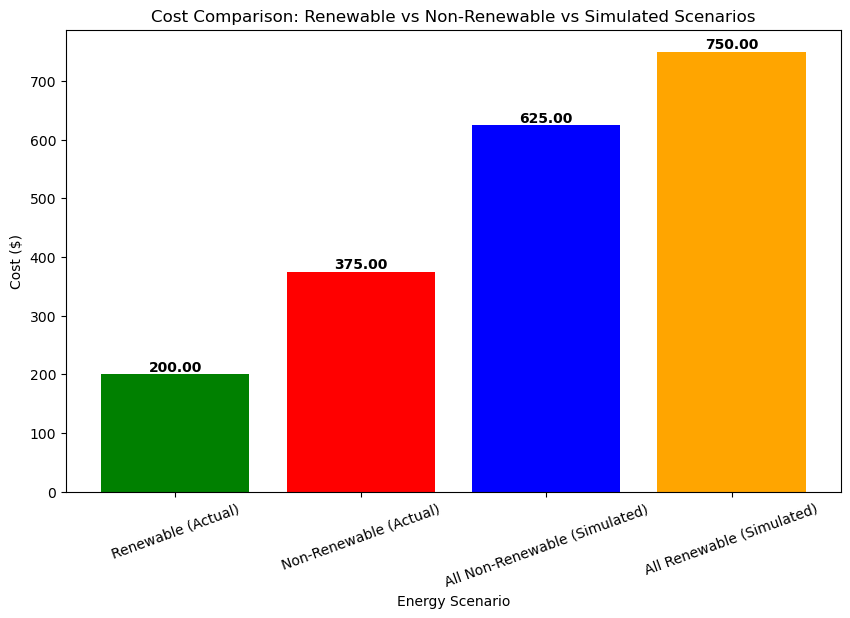

In [12]:
import pulp
import matplotlib.pyplot as plt

def visualize_results(power_vars, renewable_vars, cost_nr, cost_r, RT_Demand, selected_option):
    """Visualizes simulated cost comparison for different scenarios."""

    # Extract power generation values
    power_gen = [var.varValue for var in power_vars] if power_vars else []
    renewable_gen = [var.varValue for var in renewable_vars] if renewable_vars else []

    total_non_renewable = sum(power_gen) if power_gen else 0
    total_renewable = sum(renewable_gen) if renewable_gen else 0

    # Ask for the simulated cost only for the opposite type
    simulated_non_renewable_cost_per_mw = None
    simulated_renewable_cost_per_mw = None

    if selected_option == 1:  # User selected Non-Renewable, so ask for Renewable cost
        simulated_renewable_cost_per_mw = float(input("Enter simulated cost per MW for Renewable: "))
    elif selected_option == 2:  # User selected Renewable, so ask for Non-Renewable cost
        simulated_non_renewable_cost_per_mw = float(input("Enter simulated cost per MW for Non-Renewable: "))
    elif selected_option == 3:  # User selected Both, ask for both simulated costs
        simulated_non_renewable_cost_per_mw = float(input("Enter simulated cost per MW for Non-Renewable: "))
        simulated_renewable_cost_per_mw = float(input("Enter simulated cost per MW for Renewable: "))

    # Simulated scenarios
    all_non_renewable_cost = RT_Demand * simulated_non_renewable_cost_per_mw if simulated_non_renewable_cost_per_mw else 0
    all_renewable_cost = RT_Demand * simulated_renewable_cost_per_mw if simulated_renewable_cost_per_mw else 0

    # Actual costs
    total_cost_renewable = sum(cost_r[j] * renewable_gen[j] for j in range(len(renewable_gen))) if renewable_vars else 0
    total_cost_non_renewable = sum(cost_nr[i] * power_gen[i] for i in range(len(power_gen))) if power_vars else 0

    def add_labels(ax, bars):
        """Adds value labels on top of bars."""
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Create cost comparison chart
    fig, ax = plt.subplots(figsize=(10, 6))
    categories = [
        "Renewable (Actual)", "Non-Renewable (Actual)",
        "All Non-Renewable (Simulated)", "All Renewable (Simulated)"
    ]
    costs = [total_cost_renewable, total_cost_non_renewable, all_non_renewable_cost, all_renewable_cost]
    colors = ["green", "red", "blue", "orange"]

    bars = ax.bar(categories, costs, color=colors)
    add_labels(ax, bars)

    plt.xlabel("Energy Scenario")
    plt.ylabel("Cost ($)")
    plt.title("Cost Comparison: Renewable vs Non-Renewable vs Simulated Scenarios")
    plt.xticks(rotation=20)
    plt.show()

# Example call (Ensure these variables are properly defined in your main script)
visualize_results(power_vars, renewable_vars, cost_nr, cost_r, RT_Demand, selected_option)
